In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from matplotlib import gridspec

from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


<ipython-input-1-ae12c17c10ed>:36: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style("CMS")


In [2]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

In [3]:
colors = {}

              
colors['LO'] = 'b'#'#1f77b4' 
colors['NLO'] = 'g'#'
colors['NNLO']  = 'r'#'#1f77b4' 
colors['TMD'] =  '#9467bd'
colors['Pythia'] = 'blueviolet'
colors['Djangoh'] = '#8c564b'
colors['Rapgap'] = 'darkorange'
colors['Sherpa'] = 'crimson'
colors['Cascade'] = 'b'

#colors['LO'] ='#1f77b4'
#colors['NLO'] = '#ff7f0e'
#colors['NNLO']  ='#2ca02c'
#colors['TMD'] ='#d62728'
#colors['Pythia'] ='#9467bd'
#colors['Django'] = '#9467bd'
#colors['Rapgap'] = '
#colors['Sherpa'] = '#e377c2'
#'#7f7f7f',
#              '#bcbd22', '#17becf'


styles = {}
styles['NLO'] = 'dotted'#(0, (3, 1))
styles['LO'] = '-'
styles['NNLO'] = '-'
styles['Pythia'] = '-'
styles['Djangoh']  = 'dotted'
styles ['Rapgap'] = '-'
styles['Sherpa'] = '-'
styles['Cascade'] = '-'

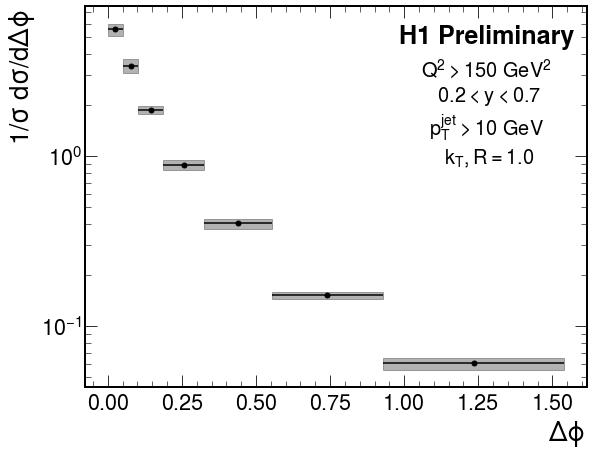

[0.02583027 0.01641899 0.01893102 0.01306629 0.00926175 0.03640495
 0.02274843]
[0.10857542 0.00463479 0.00375642 0.00571301 0.00853056 0.01284708
 0.01651983]


<ipython-input-39-3e0ca4e42ab6>:634: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 720x720 with 0 Axes>

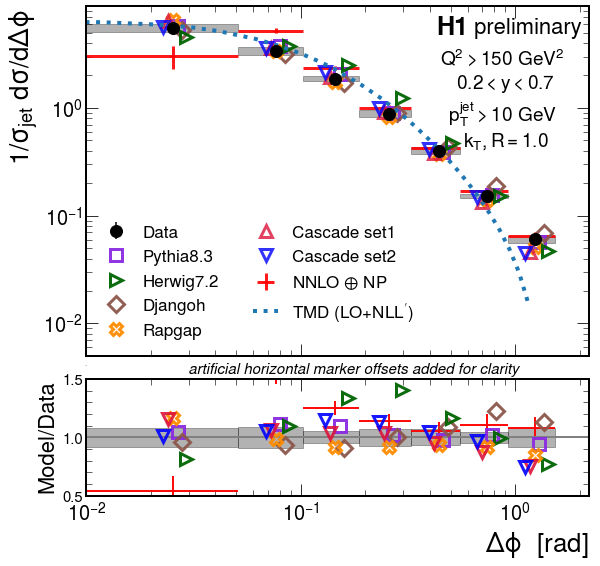

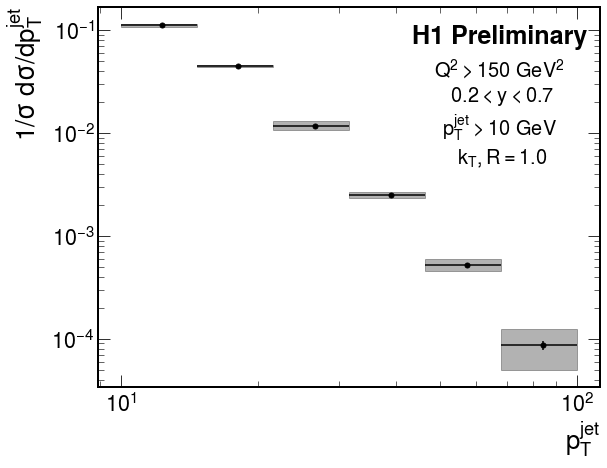

[0.01162143 0.00131436 0.04272367 0.00516197 0.0936265  0.06893878]
[0.00053292 0.00047979 0.00250507 0.00053235 0.0090154  0.00847566]


<ipython-input-39-3e0ca4e42ab6>:634: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 720x720 with 0 Axes>

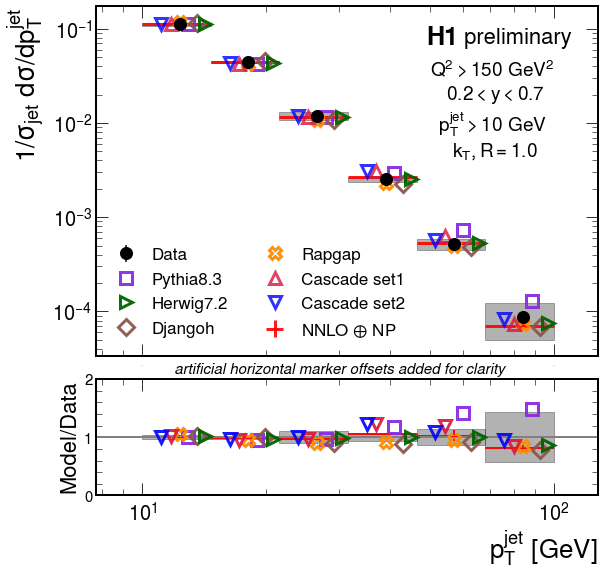

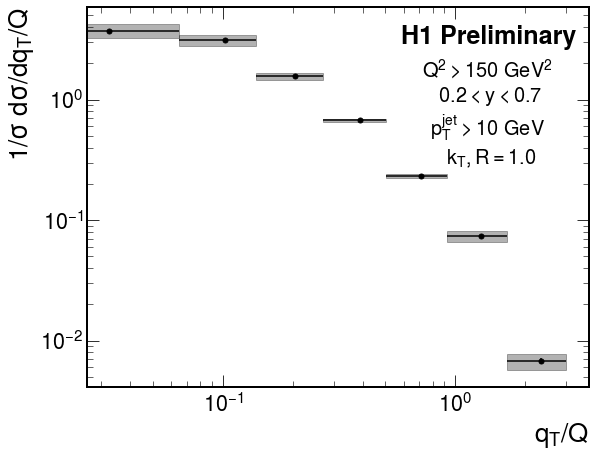

[0.09812964 0.04530691 0.0759822  0.04846896 0.00776173 0.02683086
 0.17762406]
[0.04578015 0.00628686 0.01138845 0.01243626 0.0154178  0.02817939
 0.06223468]


<ipython-input-39-3e0ca4e42ab6>:634: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


eta


<Figure size 720x720 with 0 Axes>

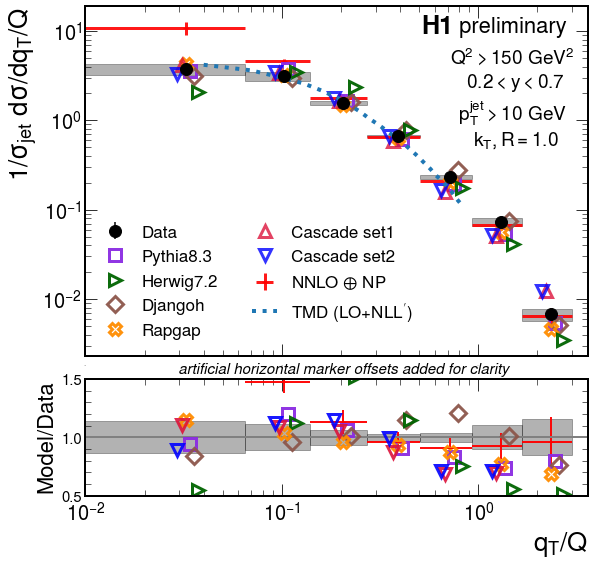

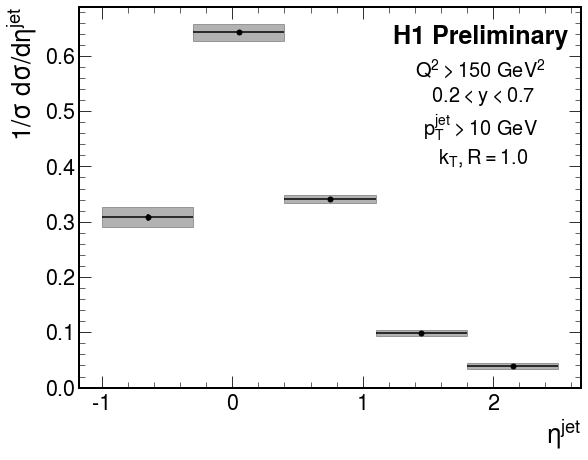

[0.05961441 0.01693378 0.06643086 0.02919463 0.02363205]
[0.01708352 0.00142328 0.00696498 0.01260211 0.04324116]
eta


<ipython-input-39-3e0ca4e42ab6>:634: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 720x720 with 0 Axes>

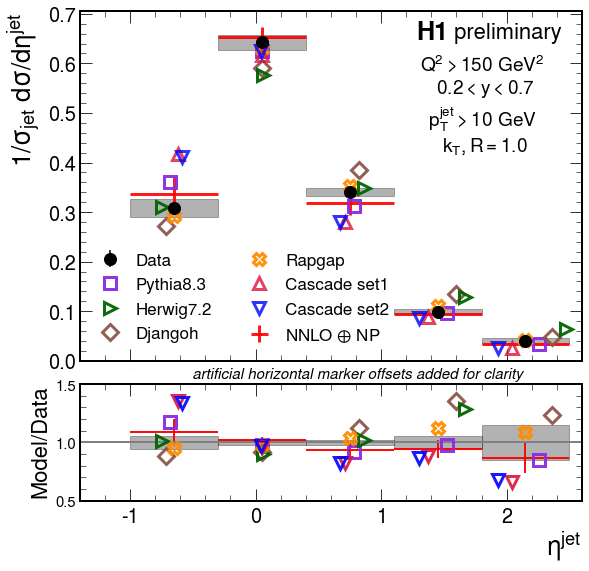

In [39]:
symbol = {}
symbol['dphi'] = '$\Delta\phi$ '
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$'

for observable in ['dphi','jetpt','qt','jeteta']:
    
    #Hadronization corrections
    
    with open('outputfiles/HadronizationCorrections.npy','rb') as f:
        hadcorr_pt = np.load(f)
        hadcorr_eta= np.load(f)
        hadcorr_qt = np.load(f)
        hadcorr_dphi = np.load(f)
    if 'jetpt' in observable:
        hadcorr = hadcorr_pt
    if 'qt' in observable:
        hadcorr = hadcorr_qt
    if 'eta' in observable:
        hadcorr = hadcorr_eta
    if 'dphi' in observable:
        hadcorr = hadcorr_dphi
    
    with open('outputfiles/HadronizationCorrections_H7.npy','rb') as f:
        hadcorr_pt = np.load(f)
        hadcorr_eta= np.load(f)
        hadcorr_qt = np.load(f)
        hadcorr_dphi = np.load(f)
    if 'jetpt' in observable:
        hadcorrH7 = hadcorr_pt
    if 'qt' in observable:
        hadcorrH7 = hadcorr_qt
    if 'eta' in observable:
        hadcorrH7 = hadcorr_eta
    if 'dphi' in observable:
        hadcorrH7 = hadcorr_dphi
    
    #QED corrections
    with open('outputfiles/QEDCorrections_Rapgap.npy' , 'rb') as f:
        qedcorr_pt = np.load(f)
        qedcorr_eta = np.load(f)
        qedcorr_qt = np.load(f)
        qedcorr_dphi = np.load(f)
    
    if 'jetpt' in observable:
        qedcorr = qedcorr_pt
    if 'qt' in observable:
        qedcorr = qedcorr_qt
    if 'eta' in observable:
        qedcorr = qedcorr_eta
    if 'dphi' in observable:
        qedcorr = qedcorr_dphi
    
    
    #Django and Rapgap predictions
    
    with open('outputfiles/MCCrossSection_%s_Django_nominal_ep0607_data_nominal.npy'%(observable),'rb') as f:
        Djangoh = np.load(f)
        Djangoh_x = np.load(f)
    with open('outputfiles/MCCrossSection_%s_Rapgap_nominal_ep0607_data_nominal.npy'%(observable),'rb') as f:
        Rapgap = np.load(f)
        Rapgap_x = np.load(f)
    with open('outputfiles/Rivet_%s.npy'%(observable),'rb') as f:
        Pythia = np.load(f)
        
    #Systematic uncertainties
    
    with open('outputfiles/ResultwithSystematicUncertainties_%s.npy'%(observable), 'rb') as f:
        x = np.load(f)
        y = np.load(f)
        xerr = np.load(f)
        yerr = np.load(f)
    
    #apply QED corrections
    
    y = np.multiply(y, qedcorr)
    
    
    #Statistical uncertainites
    
    stat_error = np.zeros(len(y))

    if 'pt' in observable:
        stat_error = np.array([ 0.80,0.69,1.73,2.97,4.72, 9.75])

    elif 'eta' in observable:
        stat_error = np.array([ 1.9,0.56,1.05, 1.93, 3.42])

    elif 'dphi' in observable:
        stat_error = np.array([1.44, 0.96,1.34, 1.66, 1.66, 1.99,2.73])
    elif 'qt' in observable:
        stat_error = np.array([1.99,1.26,1.61,1.48,1.77,2.84,5.36])

    stat_error = np.divide(stat_error,100.0)
    total_error = np.sqrt(np.multiply(stat_error,stat_error)+ np.multiply(yerr,yerr))
    
    #Other predictions
    with open('outputfiles/Sherpa.npy', 'rb') as f:
        sherpa_pt = np.load(f)
        sherpa_eta = np.load(f)
        sherpa_qt = np.load(f)
        sherpa_dphi = np.load(f)

    if 'pt' in observable:
        sherpa = sherpa_pt
    elif 'eta' in observable:
        sherpa = sherpa_eta
    elif 'qt' in observable:
        sherpa = sherpa_qt
    elif 'dphi' in observable:
        sherpa = sherpa_dphi
        
    #TMD predictions
    with open('outputfiles/Katie.npy', 'rb') as f:
        TMD_pt = np.load(f)
        TMD_eta = np.load(f)
        TMD_qt = np.load(f)
        TMD_dphi = np.load(f)

    if 'pt' in observable:
        TMD = TMD_pt
    elif 'eta' in observable:
        TMD = TMD_eta
    elif 'qt' in observable:
        TMD = TMD_qt
    elif 'dphi' in observable:
        TMD = TMD_dphi
        
    #TMD predictions2
    with open('outputfiles/Katie2.npy', 'rb') as f:
        TMD2_pt = np.load(f)
        TMD2_eta = np.load(f)
        TMD2_qt = np.load(f)
        TMD2_dphi = np.load(f)

    if 'pt' in observable:
        TMD2 = TMD2_pt
    elif 'eta' in observable:
        TMD2 = TMD2_eta
    elif 'qt' in observable:
        TMD2 = TMD2_qt
    elif 'dphi' in observable:
        TMD2 = TMD2_dphi
     
    ##################
    #First, data only.
    ##################
    
    fig,ax = plt.subplots(figsize=(9,7))

    plt.errorbar(x, y,xerr=xerr,yerr=y*stat_error,fmt='o',ms=5,color='k')
    plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
    plt.xlabel(symbol[observable])

    xposition = 0.2
    if 'jetpt' in observable:
        xposition = 0.8
    if 'qt' in observable:
        xposition = 0.8
    if 'eta' in observable:
        xposition = 0.8
    if 'dphi' in observable:
        xposition  = 0.8

    plt.text(xposition, 0.92,' H1 Preliminary ',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes, fontsize=25, fontweight='bold')

    plt.text(xposition, 0.72,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes, fontsize=20)
    #plt.legend(loc='best',fontsize=18)


    #plt.title('H1 Preliminary')
    if 'dphi' in observable:
        plt.yscale('log')
    if 'eta' in observable:
        print ('eta')

    if 'jetpt' in observable:
        plt.xscale('log')
        plt.yscale('log')

    if 'qt' in observable:
        plt.xscale('log')
        plt.yscale('log')


    for i in range(len(x)):
        x1 = x[i] - xerr[i]
        x2 = x[i] + xerr[i]
        r  = np.array([x1,x2])
        y1 = y[i]*(1.0+yerr[i])
        y2 = y[i]*(1.0-yerr[i])
        plt.fill_between(r,y1,y2, alpha=0.3,color='k',label='syst. error')


    if 'eta' in observable:
        plt.ylim(bottom=0.0)

    plt.show()
    plt.tight_layout()

    fig.savefig('figures/FinalResult_JustData_%s.png'%observable)
    
    ##################
    #end data only
    ##################
    
    ##################
    #Read in fixed order.
    ##################
        
    y_theory = {}
    y_theory_do = {}
    y_theory_up = {}
    yerr_theory = {}

    if 'jetpt' in observable:
        x_theory =  np.array([12.11528 , 17.78279,26.10157, 38.31187,56.23413,82.54042])

        y_theory['NNLO'] = np.array([0.110608780252012,0.0456758655730057,0.0116618565044425, 0.00266858037373604,0.000528808263749211,0.0000671679068329452
        ]) 
        y_theory['NLO'] = np.array([0.114972236247544,0.0434595047765226,0.0111137562868369, 0.0025582605108055,
                            0.000530057158644401,0.0000669826006876228])


        y_theory['LO'] = np.array([0.126311587752757,0.0392631056525735,0.009476532421875,0.00219986565946691,0.000475337005974265,0.000059703125])

        y_theory_do['NNLO'] = np.array([ 0.108396499, 0.044951755,0.011545538 ,0.002653156,0.000528808,6.11274E-05])
        y_theory_up['NNLO'] = np.array([ 0.111577793, 0.046321147,0.011970314, 0.002738314, 0.000540779,  6.71679E-05])

        y_theory_do['NLO'] = np.array([ 0.112404069,0.042932925,0.010753092,0.002463014,0.000511339, 6.45319E-05])
        y_theory_up['NLO'] = np.array([ 0.116971898, 0.044497374,0.011543577,0.002672959,0.000548684,  6.94715E-05])

        y_theory_do['LO'] = np.array([  0.121401681,0.038428655 ,0.00888811,0.001993072 ,0.000416989, 5.04785E-05])
        y_theory_up['LO'] = np.array([  0.129643257,   0.040327735,   0.010291542, 0.002496829,0.000560417,7.34263E-05])



    elif 'eta' in observable:
        x_theory = np.array([-0.65000,0.05000,0.75000,1.45000,2.15000])
        y_theory['NNLO'] = np.array([0.381056962886138,   0.648753612714769, 0.283387576607635,    0.0866357787908942,  0.0311693141399885  ])

        y_theory['NLO'] = np.array([   0.435720929125737, 0.662697941367878, 0.2476178480722,   0.064762021046169,      0.0174297291748527 ])


        y_theory['LO'] = np.array([   0.638976927757353,  0.647736878515625,  0.127572861408548,   0.0150334895909926,  0.000342266452205882])


        y_theory_do['NNLO'] = np.array([0.325785462,0.648753613 ,0.271867548,0.080818227 ,0.027028748])
        y_theory_up['NNLO'] = np.array([0.381056963,0.679907894,0.294565451,0.095178375,0.036924139])

        y_theory_do['NLO'] = np.array([0.399440352,0.653946649,0.231277201,0.05653785,0.014303443])
        y_theory_up['NLO']  = np.array([0.463615846, 0.670638178,0.269632646,0.074598928,0.021603283])

        y_theory_do['LO'] = np.array([0.618488808,0.643242506,0.118509941 , 0.013164397,0.000281722 ])
        y_theory_up['LO'] = np.array([0.653445305,0.651632822,0.140258839,0.017756096,0.000434863])






    elif 'qt' in observable: 
        x_theory = np.array([4.4260E-02 ,1.0222E-01 ,2.0541E-01 ,0.38915,0.71630 ,1.29878 ,2.33589])
        y_theory['NNLO'] = np.array([  10.6607929515419, 4.40753793441018, 1.75115026921194, 0.680162928536466, 0.228549161184533,
      0.0723233213901126, 0.00711814982868331  ])

        y_theory['NLO'] = np.array([   13.9724950884086,   4.09626719056974,   1.48059921414538, 0.544507609823183, 
                                    0.172372147740668 ,   0.0506518751964637,     0.00532571900785855 ])

        y_theory_do['NNLO'] = np.array([  8.954123998 ,   4.251035827,1.670187279 ,0.643939327,
                                        0.213893659, 0.066198467, 0.006474099 ])


        y_theory_up['NNLO'] = np.array([  11.84429308,    4.674291663,   1.857943958,  0.736249411,
                                         0.25110768,   0.082117254,   0.008086872])

        y_theory_do['NLO'] = np.array([ 12.15988639,    3.563217849,1.285443089 , 0.4736477,  
                                       0.14882686,                    0.042623829  ,0.004310447  ])

        y_theory_up['NLO'] = np.array([ 16.55172983, 4.848921009,   1.747575108,
                                       0.642876911, 0.203401276,   0.060625538,    0.004310447,     0.006709725])

    elif 'dphi' in observable: 
        x_theory = np.array([ 0.02535  ,
           0.076528 ,    
           0.14472 ,   
          0.25656 ,  
         0.43999 ,
        0.74084,  
       1.23427 ])                      


        y_theory['NNLO'] =          np.array([      2.948883703,   5.080398798,     2.285326073,
                                              1.029606256,    0.448229084,     0.180944874,     0.069115077])

        y_theory_do['NNLO'] =   np.array([2.246062982,  4.858835122,  2.199107478, 
                                          0.980119185, 0.42330968, 0.169894942, 
                                          0.06416892])  

        y_theory_up['NNLO'] = np.array([ 3.646094054, 5.346627432, 2.392232996, 1.08633712, 
                                        0.478620445, 0.19546867, 0.075840547])

        y_theory['NLO'] =   np.array([5.007400243,5.007165361, 2.037729236, 0.870201098, 0.36389505, 
                                      0.141454601, 0.050938785])

        y_theory_do['NLO'] = np.array([ 2.368866474 , 4.352046304 , 1.771035525 , 0.756323302 ,
                                         0.316224651 , 0.122909448 , 0.043535906 ])    
        y_theory_up['NLO'] = np.array([6.93365544, 5.90977469, 2.404256179, 
                                       1.026199443, 0.428631534, 0.166535815, 0.060038913])    



    kang_x = np.array([1.00E-02,   4.00E-02,   7.00E-02 ,   1.00E-01, 1.30E-01 ,1.60E-01,  1.90E-01, 2.20E-01 ,  2.50E-01  ,  2.80E-01, 3.10E-01,
                          4.10E-01,  4.50E-01,  4.90E-01,   5.30E-01, 5.70E-01, 6.10E-01, 6.50E-01, 6.90E-01,   
                         7.30E-01,  7.70E-01, 8.10E-01])
    kang_y = np.array([3.61E+03,  7.66E+03,6.63E+03,5.50E+03, 4.71E+03, 3.93E+03,    3.30E+03,2.74E+03,2.29E+03,  
                       1.90E+03  ,  1.64E+03,
          1.04E+03,
      8.66E+02,
           7.31E+02,
            6.13E+02,
          5.24E+02,
           4.42E+02,
            3.89E+02,
            3.36E+02,
           2.92E+02,
          2.47E+02,
           2.16E+02 
    ])

    kang_y = kang_y/914.46 

    feng_x = np.array([2., 2.1, 2.2,2.3,2.4, 2.45, 2.5, 2.55,2.6,2.65, 2.7, 
     2.75, 2.8,2.85, 2.9, 2.95, 3., 3.02,3.04, 3.06, 3.08, 
     3.1,  3.11, 3.12, 3.13, 3.1416])

    feng_x = 3.1416-feng_x


    feng_y = np.array([  0.00179917,  0.00331018,  0.00539893,  0.00833971,  0.0126007,
      0.0154574,   0.0189805,   0.0233841,  0.028952,  0.0360966, 
       0.0454342,   0.0579107,  0.074916,   0.0984489,  0.132818,
      0.181728,  0.259287,  0.300555,  0.350406,   0.411112,  0.485287,
      0.572557,     0.618239, 0.659469,  0.694866, 0.711227
    ])

    feng_y_norm = feng_y/np.sum(feng_y)
    
    ##################
    #End read in fixed order.
    ##################
    
    ##################
    #Make final plots
    ##################
    
    fig = plt.figure(figsize=(9, 9))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    gs.update(wspace=0.025, hspace=0.1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax0.minorticks_on()

    pythialine = plt.errorbar(x*1.05, Pythia,xerr=xerr,ms=12,lw=0,label='Pythia', 
                   alpha=0.95,color=colors['Pythia'],marker='s',markerfacecolor='none',markeredgewidth=3)
    pythialine[-1][0].set_linestyle(styles['Pythia']) 

    djangohline = plt.errorbar(x*1.1, Djangoh,xerr=xerr,ms=12,lw=0,label='Djangoh', 
                   alpha=0.95,color=colors['Djangoh'],marker='D',markerfacecolor='none',markeredgewidth=3)
    djangohline[-1][0].set_linestyle(styles['Djangoh']) 

    rapgapline = plt.errorbar(x, Rapgap,xerr=xerr,ms=12,lw=0,label='Rapgap', 
                   alpha=0.95,color=colors['Rapgap'],marker='X',markerfacecolor='none',markeredgewidth=3)
    rapgapline[-1][0].set_linestyle(styles['Rapgap']) 

    #Herwig
    
    herwigname = {}
    herwigname['dphi'] = 'jetpdhi'
    herwigname['jeteta'] = 'jeteta'
    herwigname['qt']  = 'jetqt'
    herwigname['jetpt'] = 'jetpt'
    
    H_xvals = []
    H_yvals = []
    H_eyvals = []
    for mytype in [herwigname[observable]]: #['jeteta','jetpt','jetqt','jetpdhi']:
        #myfile = open("Herwig/rivet-plots_NLO_had_500k/leptonjet/"+mytype+".dat")
        myfile = open("Herwig/rivet-plots_LO_had_250k_fixed/leptonjet/"+mytype+".dat")
        H_xvals = []
        H_yvals = []
        H_eyvals = []
        for line in myfile:
            if len(line.split()) != 5:
                continue
            H_xvals += [0.5*(float(line.split()[0])+float(line.split()[1]))]
            H_yvals += [float(line.split()[2])]
            H_eyvals += [float(line.split()[3])]
        H_xvals = np.array(H_xvals)
        H_yvals = np.array(H_yvals)
        H_eyvals = np.array(H_eyvals)
    H_sum = 0.
    for i in range(len(H_yvals)):
        H_sum+=H_yvals[i]*xerr[i]*2
    herwigline = plt.errorbar(x*1.15, H_yvals/H_sum,xerr=xerr,ms=12,lw=0,label='Rapgap', 
                   alpha=0.95,color="darkgreen",marker='>',markerfacecolor='none',markeredgewidth=3)
    #End Herwig
    
    TMDline = plt.errorbar(x*0.95, TMD,xerr=xerr,ms=12,lw=0,label='CASCADE PB1', 
                   alpha=0.8,color=colors['Sherpa'],marker='^',markerfacecolor='none',markeredgewidth=3)
    TMDline[-1][0].set_linestyle(styles['Djangoh']) 

    TMD2line = plt.errorbar(x*0.9, TMD2,xerr=xerr,ms=12,lw=0,label='CASCADE PB2', 
                   alpha=0.8,color=colors['Cascade'],marker='v',markerfacecolor='none',markeredgewidth=3)
    TMD2line[-1][0].set_linestyle(styles['Cascade']) 

    #Fixed order
    y_NNLO = np.divide(y_theory['NNLO'],hadcorr)
    yerr_NNLO = abs(1.-np.divide(y_theory['NNLO'],hadcorr)/np.divide(y_theory['NNLO'],hadcorrH7))
    yerr_NNLO = yerr_NNLO**2 + (0.5*(y_theory_do['NNLO']-y_theory_up['NNLO'])/y_NNLO)**2
    yerr_NNLO = yerr_NNLO**0.5
    line3 = plt.errorbar(x, y_NNLO, yerr=y_NNLO*yerr_NNLO, xerr=xerr,label='NNLO x NP',lw=3,
                   alpha=0.9,fmt="_",color=colors['NNLO'])
    
    #TMD "analytic"
    if 'qt' in observable:
        tmdline = plt.errorbar(kang_x[1:],kang_y[1:]/2.0,label='TMD (LO+NLL$^{\prime}$)',lw=4,ls=":")

    if 'dphi' in observable:
        tmdline = plt.errorbar(feng_x,9*feng_y,label='TMD (LO+NLL$^{\prime}$)',lw=4,ls=":")
    
    #sherpaline = plt.errorbar(x, sherpa,xerr=xerr,ms=9,lw=3,label='Sherpa', 
    #               alpha=0.8,fmt='_',color=colors['Sherpa'])
    #sherpaline[-1][0].set_linestyle(styles['Sherpa']) 

    plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
    if 'pt' in observable:
        plt.xlabel(symbol[observable]+' [GeV]')
    if 'dphi' in observable:
        plt.xlabel(symbol[observable]+' [rad]')
    if 'eta' in observable or 'qt' in observable:
        plt.xlabel(symbol[observable])

    xposition = 0.2
    if 'jetpt' in observable:
        xposition = 0.82
    if 'qt' in observable:
        xposition = 0.86
    if 'eta' in observable:
        xposition = 0.8
    if 'dphi' in observable:
        xposition  = 0.84
        
    if 'qt' not in observable:
        plt.text(xposition-0.1, 1.25*(1),'H1',
                 horizontalalignment='center',multialignment='left',
                 verticalalignment='center',transform = ax.transAxes, fontsize=25, fontweight='bold')

        plt.text(xposition+0.05, 1.25*(1),' preliminary ',
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform = ax.transAxes, fontsize=22)
    
    else:
        plt.text(xposition-0.1-0.05, 1.25,'H1',
                 horizontalalignment='center',multialignment='left',
                 verticalalignment='center',transform = ax.transAxes, fontsize=25, fontweight='bold')

        plt.text(xposition+0.05-0.05, 1.25,' preliminary ',
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform = ax.transAxes, fontsize=22)

    #plt.text(xposition, 1.06*(('dphi' in observable)*(0.9)+('dphi' not in observable)),'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
    plt.text(xposition, 1.06*(1),'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes, fontsize=19)

    if 'dphi' in observable:
        plt.yscale('log')
        plt.xscale('log')
        plt.xlim([0.01,2.2])

    if 'eta' in observable:
        plt.xlim([-1.4,2.6])
        print ('eta')

    if 'jetpt' in observable:
        plt.xscale('log')
        plt.yscale('log')

    if 'qt' in observable:
        plt.xscale('log')
        plt.yscale('log')
        plt.xlim([0.01,3.6])


    for i in range(len(x)):
        x1 = x[i] - xerr[i]
        x2 = x[i] + xerr[i]
        r  = np.array([x1,x2])
        y1 = y[i]*(1+yerr[i])
        y2 = y[i]*(1-yerr[i])
        plt.fill_between(r,y1,y2, alpha=0.3,color='k')


    if 'eta' in observable:
        plt.ylim(bottom=0.0)
    elif 'dphi' in observable:
        plt.ylim(bottom=0.005)


    #data    
    dataline = plt.errorbar(x, y,yerr=y*stat_error,fmt='o',color='k',ms=12)
    handles, labels = ax0.get_legend_handles_labels()
    ax0.legend(handles=[dataline,pythialine,herwigline,djangohline,rapgapline,TMDline,TMD2line,line3],
                     labels=['Data','Pythia8.3','Herwig7.2','Djangoh','Rapgap','Cascade set1', 'Cascade set2',r'NNLO $\oplus$ NP'],
               loc='lower left',fontsize=17,ncol=2)
    if 'qt' in observable or 'dphi' in observable:
        ax0.legend(handles=[dataline,pythialine,herwigline,djangohline,rapgapline,TMDline,TMD2line,line3,tmdline],
                     labels=['Data','Pythia8.3','Herwig7.2','Djangoh','Rapgap','Cascade set1', 'Cascade set2',r'NNLO $\oplus$ NP','TMD (LO+NLL$^{\prime}$)'],
               loc='lower left',fontsize=17,ncol=2)


    plt.xlabel("",fontsize=20)
    plt.xticks(fontsize=0)
    #plt.locator_params(axis='y', nbins=6)

    ax1 = plt.subplot(gs[1])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(direction="in",which="both")
    ax1.minorticks_on()

    if 'pt' in observable:
        plt.text(12,2.1,"artificial horizontal marker offsets added for clarity",fontstyle="italic",fontsize=15)
    if 'qt' in observable:
        plt.text(0.03,1.55,"artificial horizontal marker offsets added for clarity",fontstyle="italic",fontsize=15)
    if 'eta' in observable:
        plt.text(-0.5,1.55,"artificial horizontal marker offsets added for clarity",fontstyle="italic",fontsize=15)
    if 'phi' in observable:
        plt.text(0.03,1.55,"artificial horizontal marker offsets added for clarity",fontstyle="italic",fontsize=15)
    

    ##RATIO 

    pythialine = plt.errorbar(x*1.05, np.divide(Pythia,y), xerr=xerr,label='Pythia8',ms=12,lw=0,
                   alpha=0.95,color=colors['Pythia'],marker='s',markerfacecolor='none',markeredgewidth=3)
    pythialine[-1][0].set_linestyle(styles['Pythia']) 

    djangohline = plt.errorbar(x*1.1, np.divide(Djangoh,y), xerr=xerr,label='Djangoh',ms=12,lw=0,
                   alpha=0.95,color=colors['Djangoh'],marker='D',markerfacecolor='none',markeredgewidth=3)
    djangohline[-1][0].set_linestyle(styles['Djangoh'])

    herwigline = plt.errorbar(x*1.15, np.divide(H_yvals/H_sum,y), xerr=xerr,label='Djangoh',ms=12,lw=0,
                   alpha=0.95,color='darkgreen',marker='>',markerfacecolor='none',markeredgewidth=3)
    
    rapgapline = plt.errorbar(x*1, np.divide(Rapgap,y), xerr=xerr,label='Rapgap',ms=12,lw=0,
                   alpha=0.95,color=colors['Rapgap'],marker='X',markerfacecolor='none',markeredgewidth=3)
    rapgapline[-1][0].set_linestyle(styles['Rapgap']) 


    TMDline = plt.errorbar(x*0.95, np.divide(TMD,y), xerr=xerr,label='CASCADE',ms=12,lw=0,
                 alpha=0.9,color=colors['Sherpa'],marker='v',markerfacecolor='none',markeredgewidth=3)
    TMDline[-1][0].set_linestyle(styles['Djangoh']) 

    TMD2line = plt.errorbar(x*0.9, np.divide(TMD2,y), xerr=xerr,label='CASCADE',ms=12,lw=0,
                 alpha=0.9,color=colors['Cascade'],marker='v',markerfacecolor='none',markeredgewidth=3)
    TMD2line[-1][0].set_linestyle(styles['Cascade']) 

    line3 = plt.errorbar(x, np.divide(np.divide(y_theory['NNLO'],hadcorr),y), yerr=np.divide(y_NNLO*yerr_NNLO,y),xerr=xerr,label='NNLO x NP',lw=2,
                   alpha=0.95,fmt="_",color=colors['NNLO'])
    line3[-1][0].set_linestyle(styles['NNLO']) 

    #sherpaline = plt.errorbar(x, np.divide(sherpa,y), xerr=xerr,label='Sherpa',lw=3,
    #               alpha=0.9,fmt='_',color=colors['Sherpa'])
    #sherpaline[-1][0].set_linestyle(styles['Sherpa']) 


    #dataline = plt.fill_between(x,1 + total_error, 1-total_error,alpha=0.2,color='black',label='data uncertainty')


    for i in range(len(x)):
        x1 = x[i] - xerr[i]
        x2 = x[i] + xerr[i]
        r  = np.array([x1,x2])
        up = 1+yerr[i]
        do = (1-yerr[i])
        dataline = plt.fill_between(r,up,do, alpha=0.3,color='k')

    if 'qt' in observable or 'pt' in observable or 'phi' in observable:
        #plt.yscale('log')
        plt.xscale('log')

    plt.ylabel('Model/Data',fontsize=22)
    plt.ylim([0.5,1.5])

    if 'pt' in observable:
        plt.ylim([0.0,2.0])

        plt.xlabel(symbol[observable]+' [GeV]')
    if 'dphi' in observable:
        plt.xlabel(symbol[observable]+' [rad]')
        plt.xlim([0.01,2.2])

    if 'eta' in observable or 'qt' in observable:
        plt.xlabel(symbol[observable])
    if 'eta' in observable:
        plt.xlim([-1.4,2.6])
    if 'qt' in observable:
        plt.xlim([0.01,3.6])

    #plt.locator_params(axis='x', nbins=6)
    plt.ylabel("Model/Data",fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.axhline(y=1,linewidth=2, color='gray')   

    plt.tight_layout()

    fig.savefig('figures/FinalResult_withMC_%s.png'%observable)
    fig.savefig('figures/FinalResult_withMC_%s.pdf'%observable)
    
    #Prepare HEPData tables.
    
    if 'pt' in observable:
        myfile = open("HEPData/data1.yaml",'w')
    if 'dphi' in observable:
        myfile = open("HEPData/data4.yaml",'w')
    if 'eta' in observable:
        myfile = open("HEPData/data2.yaml",'w')
    if 'qt' in observable:
        myfile = open("HEPData/data3.yaml",'w')
    myfile.write("independent_variables:\n")
    if 'pt' in observable:
        myfile.write("- header: {name: jet PT, units: GEV}\n")
    if 'dphi' in observable:
        myfile.write("- header: {name: DeltaPHI, units: radians}\n")
    if 'eta' in observable:
        myfile.write("- header: {name: jet ETA, units: none}\n")
    if 'qt' in observable:
        myfile.write("- header: {name: qT/Q, units: none}\n")
    myfile.write("  values:\n")
    for i in range(len(x)):
        myfile.write("  - {low: "+'%0.3f' % (x[i] - xerr[i])+", high: "+'%0.3f' % (x[i] + xerr[i])+"}\n")
    myfile.write("dependent_variables:\n")
    if 'pt' in observable:
        myfile.write("- header: {name: 1/SIG(fiducial) * D(SIG(fiducial))/DPT, units: GEV**-1}\n")
    if 'dphi' in observable:
        myfile.write("- header: {name: 1/SIG(fiducial) * D(SIG(fiducial))/DDeltaPHI, units: radians**-1}\n")
    if 'eta' in observable:
        myfile.write("- header: {name: 1/SIG(fiducial) * D(SIG(fiducial))/DETA, units: none}\n")
    if 'qt' in observable:
        myfile.write("- header: {name: 1/SIG(fiducial) * D(SIG(fiducial))/Dqt/Q, units: none}\n")
    myfile.write("  qualifiers:\n")
    myfile.write("  - {name: RE, value: e P --> e J}\n")
    myfile.write("  - {name: SQRT(S), units: GEV, value: 318}\n")
    myfile.write("  values:\n")
    for i in range(len(x)):
        #Figure out sig figs
        ndigits = int(-np.log(stat_error[i]*y[i])/np.log(10.))+1
        myprecision = '%0.'+str(ndigits)+'f'
        myfile.write("  - value: "+myprecision % y[i]+'\n')
        myfile.write("    errors:\n")
        myfile.write("    - {symerror: "+myprecision % (y[i]*stat_error[i])+", label: stat}\n")
        myfile.write("    - {symerror: "+myprecision % (y[i]*yerr[i])+", label: syst}\n")
    myfile.close()